In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

---

## Reading data

In [2]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- There is no missing values 

In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Feature Engineering 

In [6]:
# the ID feature is redundant corresponding to the index
df.drop('ID', inplace=True, axis=1)

In [7]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


---

## Feature transformation
Income here is annual while CCAvg is monthly

In [8]:
df['CCAvg'] = df['CCAvg'] * 12

<Axes: >

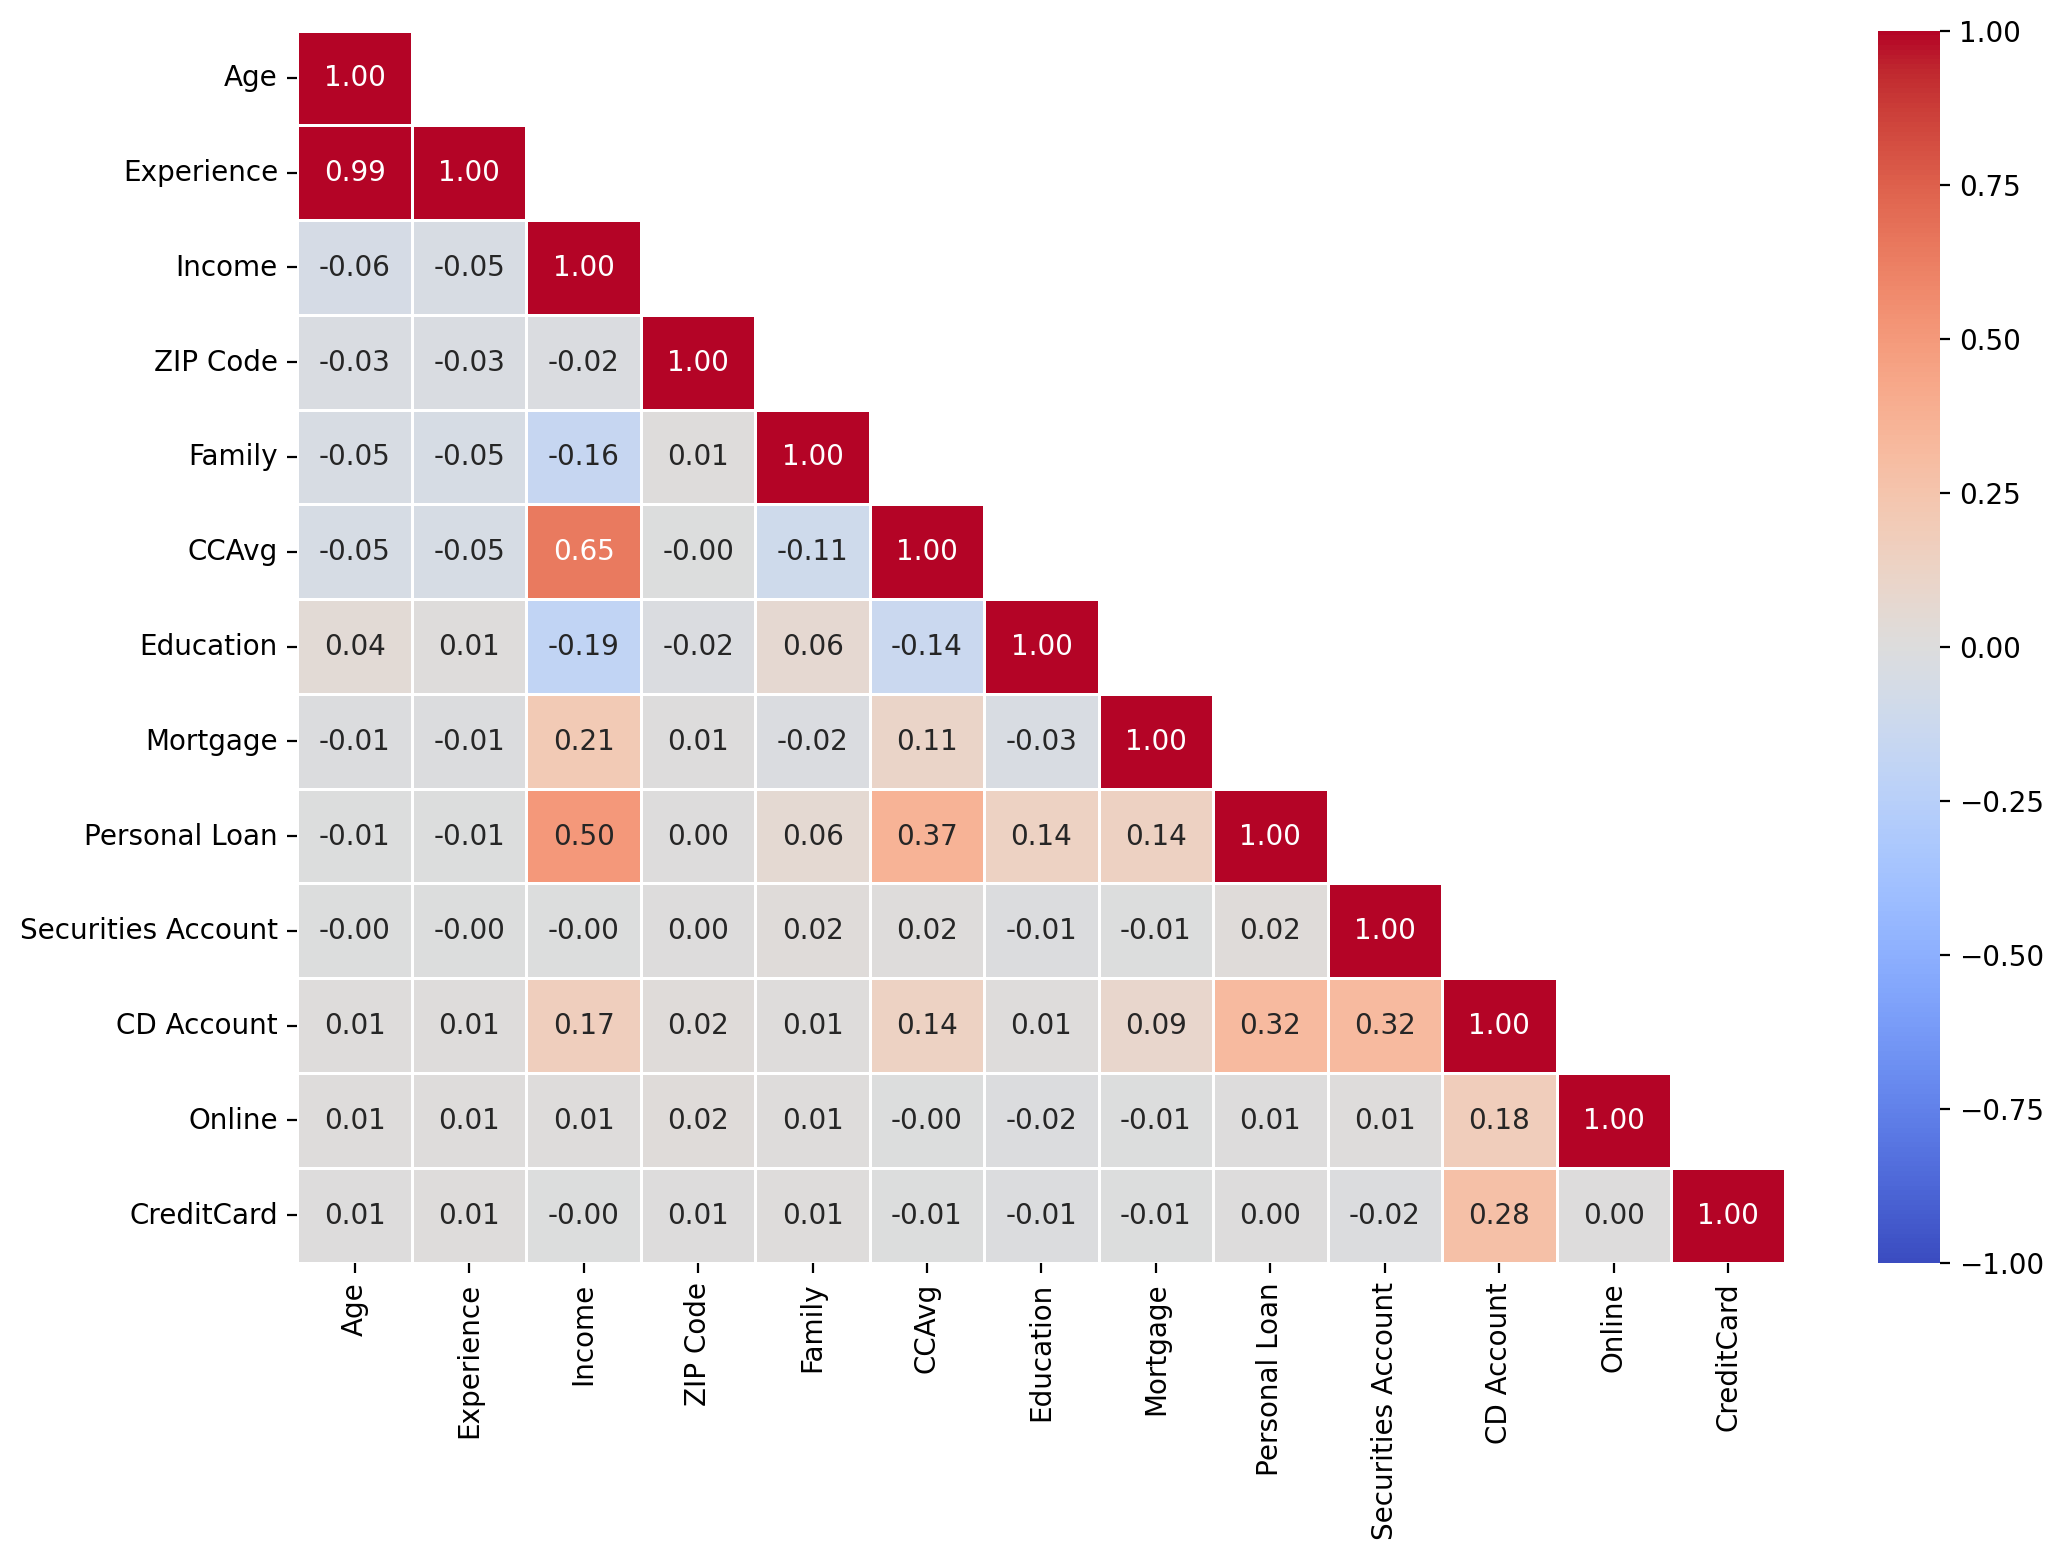

In [9]:
#correlation
plt.figure(figsize=(12,8), dpi=200)

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask,1)] = True

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask,
           vmin = -1, vmax = 1)

The 2 features Age and Experience are highly correlated(0.99), we sholud remove one of them

In [10]:
df.drop('Age', axis=1)

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,8,45,91330,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,40,92697,1,22.8,3,0,0,0,0,1,0
4996,4,15,92037,4,4.8,1,85,0,0,0,1,0
4997,39,24,93023,2,3.6,3,0,0,0,0,0,0
4998,40,49,90034,3,6.0,2,0,0,0,0,1,0


In [11]:
var = df.corr()['Personal Loan'].sort_values()

In [12]:
var

Age                  -0.007726
Experience           -0.007413
ZIP Code              0.000107
CreditCard            0.002802
Online                0.006278
Securities Account    0.021954
Family                0.061367
Education             0.136722
Mortgage              0.142095
CD Account            0.316355
CCAvg                 0.366891
Income                0.502462
Personal Loan         1.000000
Name: Personal Loan, dtype: float64

- The most correlated features with `Personal Loan` are:
    - Income
    - CCAVG
    - CD Account

---

## Dealing with noisy data

### noise is unwanted and wrong data and it should be removed.

There are features that must be positive values : `age`, `Experience`, `Family`

In [13]:
def check_for_noise(feature_name):
    negative_mask = df[feature_name] < 0
    negative_rows = df[negative_mask]
    cnt = negative_rows[feature_name].count()
    print(cnt)
    
    if (cnt > 0):
        display(negative_rows)
        df.drop(negative_rows.index, inplace=True)

In [14]:
check_for_noise('Experience')

52


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,94303,4,27.6,3,0,0,0,0,0,1
226,24,-1,39,94085,2,20.4,2,0,0,0,0,0,0
315,24,-2,51,90630,3,3.6,3,0,0,0,0,1,0
451,28,-2,48,94132,2,21.0,3,89,0,0,0,1,0
524,24,-1,75,93014,4,2.4,1,0,0,0,0,1,0
536,25,-1,43,92173,3,28.8,2,176,0,0,0,1,0
540,25,-1,109,94010,4,27.6,3,314,0,0,0,1,0
576,25,-1,48,92870,3,3.6,3,0,0,0,0,0,1
583,24,-1,38,95045,2,20.4,2,0,0,0,0,1,0
597,24,-2,125,92835,2,86.4,1,0,0,1,0,0,1


There is mean that there are 52 rows that are noise and have been removed must be removed

In [15]:
rows = check_for_noise('Family')

0


---

The `Education` feature must have only three values:
   <br> 1: undergrad
   <br> 2: Graduate
   <br> 3: Advanced/Professional

In [16]:
range_mask = (df['Education'] > 3) | (df['Education'] < 1)
range_rows = df[range_mask]
range_rows['Education'].count()

0

---

`ZIP code` feature must be 5 digits

In [17]:
range_mask = (df['ZIP Code'] < 10000) | (df['ZIP Code'] > 99999)
range_rows = df[range_mask]
range_rows['ZIP Code'].count()

1

In [18]:
#df.loc[range_rows['ZIP Code'].index]
range_rows

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51,25,21,9307,4,7.2,3,0,0,0,0,1,1


In [19]:
df.drop(range_rows.index, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4947 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4947 non-null   int64  
 1   Experience          4947 non-null   int64  
 2   Income              4947 non-null   int64  
 3   ZIP Code            4947 non-null   int64  
 4   Family              4947 non-null   int64  
 5   CCAvg               4947 non-null   float64
 6   Education           4947 non-null   int64  
 7   Mortgage            4947 non-null   int64  
 8   Personal Loan       4947 non-null   int64  
 9   Securities Account  4947 non-null   int64  
 10  CD Account          4947 non-null   int64  
 11  Online              4947 non-null   int64  
 12  CreditCard          4947 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 541.1 KB


The number of coloumns has changed

---

## Dealing with outliers

<Axes: xlabel='Mortgage'>

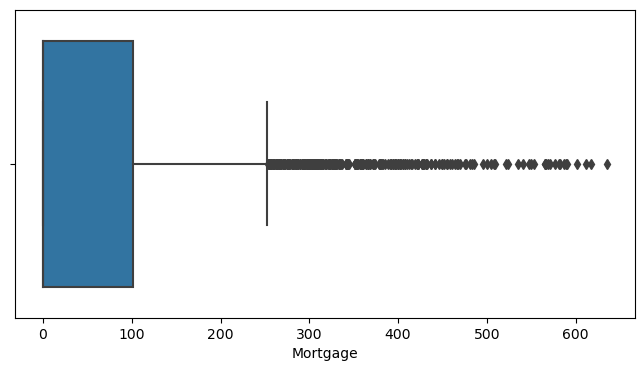

In [21]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Mortgage',data=df)

<Axes: xlabel='CCAvg'>

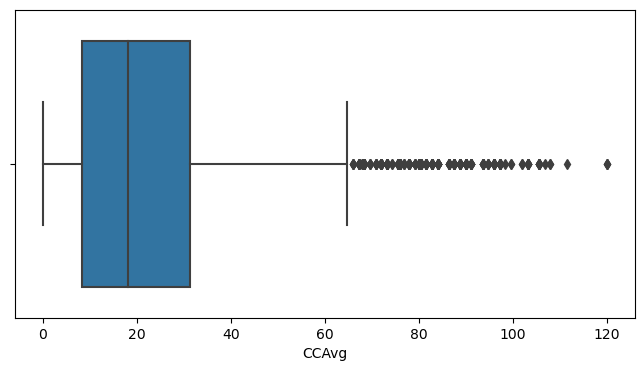

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(x='CCAvg',data=df)

In [23]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 

In [24]:
print(IQR)

Age                     19.0
Experience              19.5
Income                  59.0
ZIP Code              2697.0
Family                   2.0
CCAvg                   22.8
Education                2.0
Mortgage               101.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   1.0
CreditCard               1.0
dtype: float64


In [25]:
detected_mask = (df < (Q1 - 3 * IQR)) | (df > (Q3 + 3 * IQR))

In [26]:
detected_mask.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In these **detected outlier dataframe** , we will consider only :
    <br> - `Income`
    <br> - `Experience` 
    <br> - `CCAVG`
    <br> - `Mortgage`
   
The rest is either:
    <br> - `catagorical features` as Education and Family
    <br> - `encoded features` as CreditCard, Online, CD Account, Securities Account 

In [27]:
valid_features_mask = detected_mask[['Experience','Mortgage', 'CCAvg', 'Income']] 

In [28]:
valid_features_mask #mask for certain features

,Experience,Mortgage,CCAvg,Income
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
4995,False,False,False,False
4996,False,False,False,False
4997,False,False,False,False
4998,False,False,False,False


In [29]:
features = ['Experience', 'Mortgage', 'CCAvg', 'Income']

for feature in features:
    rows_to_drop = df[valid_features_mask[feature]].index
    df.drop(rows_to_drop, inplace=True)
    print(f'{feature} {rows_to_drop}')

Experience Index([], dtype='int64')
Mortgage Index([  42,   59,  303,  354,  365,  459,  473,  479,  570,  684,  782,  952,
       1111, 1167, 1273, 1277, 1359, 1372, 1623, 1674, 1716, 1783, 1789, 1937,
       2041, 2217, 2319, 2382, 2394, 2443, 2541, 2653, 2668, 2687, 2714, 2753,
       2769, 2812, 2841, 2934, 2946, 2956, 2989, 3012, 3021, 3357, 3373, 3411,
       3470, 3472, 3515, 3571, 3608, 3662, 3702, 3776, 3945, 4016, 4238, 4240,
       4294, 4345, 4422, 4541, 4585, 4655, 4672, 4812, 4842, 4859],
      dtype='int64')
CCAvg Index([   9,  614,  787,  881,  917, 1339, 1354, 1797, 2101, 2337, 2447, 2952,
       2988, 3312, 3384, 3804, 3822, 3943, 4156, 4225, 4414, 4603, 4937],
      dtype='int64')
Income Index([], dtype='int64')


C:\Users\user\AppData\Local\Temp\ipykernel_26428\586850689.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rows_to_drop = df[valid_features_mask[feature]].index
C:\Users\user\AppData\Local\Temp\ipykernel_26428\586850689.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rows_to_drop = df[valid_features_mask[feature]].index


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4854 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4854 non-null   int64  
 1   Experience          4854 non-null   int64  
 2   Income              4854 non-null   int64  
 3   ZIP Code            4854 non-null   int64  
 4   Family              4854 non-null   int64  
 5   CCAvg               4854 non-null   float64
 6   Education           4854 non-null   int64  
 7   Mortgage            4854 non-null   int64  
 8   Personal Loan       4854 non-null   int64  
 9   Securities Account  4854 non-null   int64  
 10  CD Account          4854 non-null   int64  
 11  Online              4854 non-null   int64  
 12  CreditCard          4854 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 530.9 KB


In [31]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1


---
---

# Train | Test split

In [32]:
X = df.drop('Personal Loan',axis=1)
y = df['Personal Loan']

In [33]:
#TRAin TEST SPLIT
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

A `tree-based` model won't suffer from unscaled data, because scale doesn't affect them at all,
but if you perform Gradient Boosting on Classifiers, the scale does affect learning.

The source: https://stackabuse.com/feature-scaling-data-with-scikit-learn-for-machine-learning-in-python/

---

## Creating the model

In [34]:
from sklearn.tree import DecisionTreeClassifier
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
tree_param = {'criterion':['gini','entropy'],
            'max_depth':range(1,10),
            'min_samples_leaf':range(1,10),
            'min_samples_split':range(1,10)
           }

In [37]:
model = DecisionTreeClassifier()

In [38]:
# LINK: https://plainenglish.io/blog/hyperparameter-tuning-of-decision-tree-classifier-using-gridsearchcv-2a6ebcaffeda
grid_model = GridSearchCV(estimator=model,
                          param_grid=tree_param, 
                          cv=10,                           #cross_validation
                          verbose=1,                       #low verbosity
                          n_jobs=-1)                       # jobs to be done in parallel (-1 means on all processors)

In [39]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 14580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\Lib\site-package

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [40]:
y_pred = grid_model.predict(X_test)

In [41]:
grid_model.best_score_

0.9858736769043901

In [42]:
grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

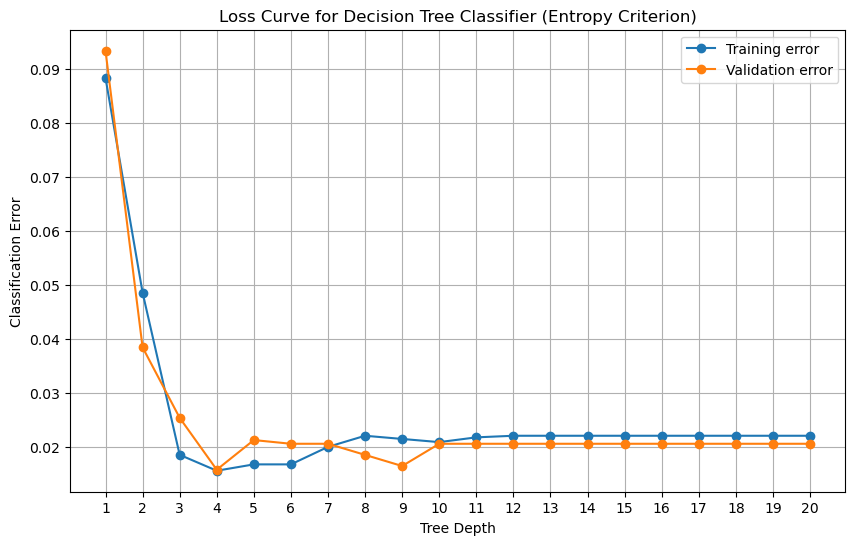

In [43]:
train_errors = []
val_errors = []

# Define range of depths to try
depths = range(1, 21)

# Iterate over each depth
for depth in depths:
    # Create decision tree classifier with given parameters
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, min_samples_leaf=3, min_samples_split=2, random_state=42)
    
    # Perform cross-validation with 10 folds
    cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
    
    # Calculate average training and validation error for this depth
    train_error = 1 - np.mean(cv_scores)
    val_error = 1 - clf.fit(X_train, y_train).score(X_test, y_test)
    
    # Append errors to lists
    train_errors.append(train_error)
    val_errors.append(val_error)

# Plotting the loss curve
plt.figure(figsize=(10, 6))
plt.plot(depths, train_errors, label='Training error', marker='o')
plt.plot(depths, val_errors, label='Validation error', marker='o')
plt.title('Loss Curve for Decision Tree Classifier (Entropy Criterion)')
plt.xlabel('Tree Depth')
plt.ylabel('Classification Error')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

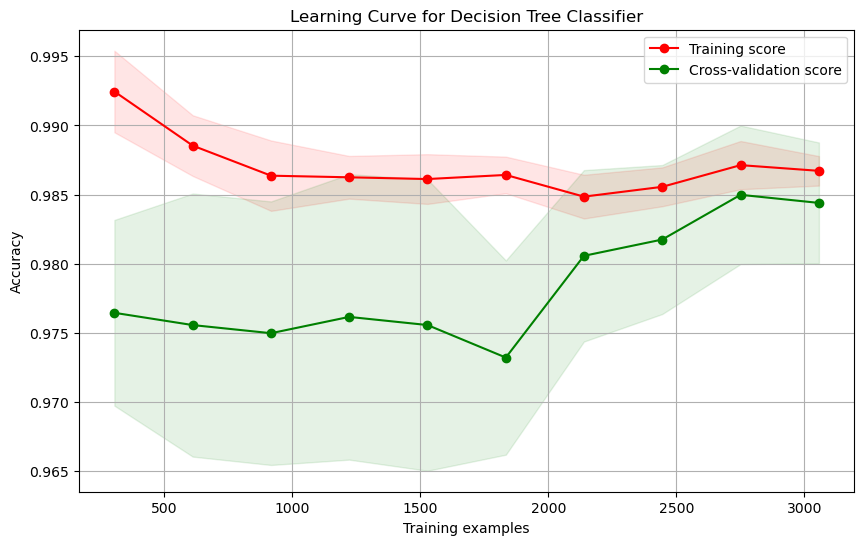

In [44]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3, min_samples_split=2, random_state=42)

# Define training sizes (10 evenly spaced values between 10% and 100% of the training set)
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, train_sizes=train_sizes, cv=10, scoring='accuracy')

# Calculate mean and standard deviation of training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for Decision Tree Classifier")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

---
---

## Evaluation

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [47]:
 confusion_matrix(y_test,y_pred)

array([[1315,    6],
       [  19,  117]], dtype=int64)

confusion matrix
[[1315    6]
 [  19  117]]


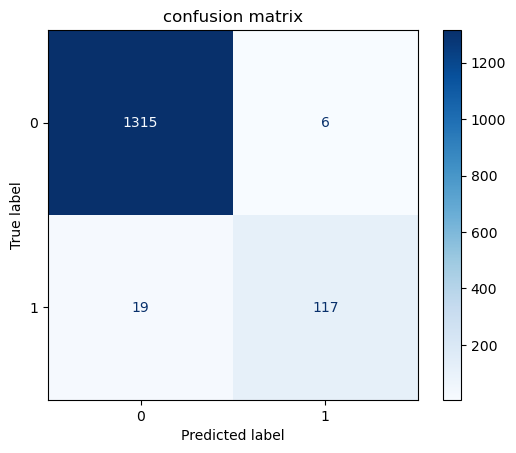

In [48]:
# The source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
disp = ConfusionMatrixDisplay.from_estimator(
    grid_model,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
)
disp.ax_.set_title('confusion matrix')

print('confusion matrix')
print(disp.confusion_matrix)

plt.show()

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1321
           1       0.95      0.86      0.90       136

    accuracy                           0.98      1457
   macro avg       0.97      0.93      0.95      1457
weighted avg       0.98      0.98      0.98      1457



In [50]:
from sklearn.tree import plot_tree

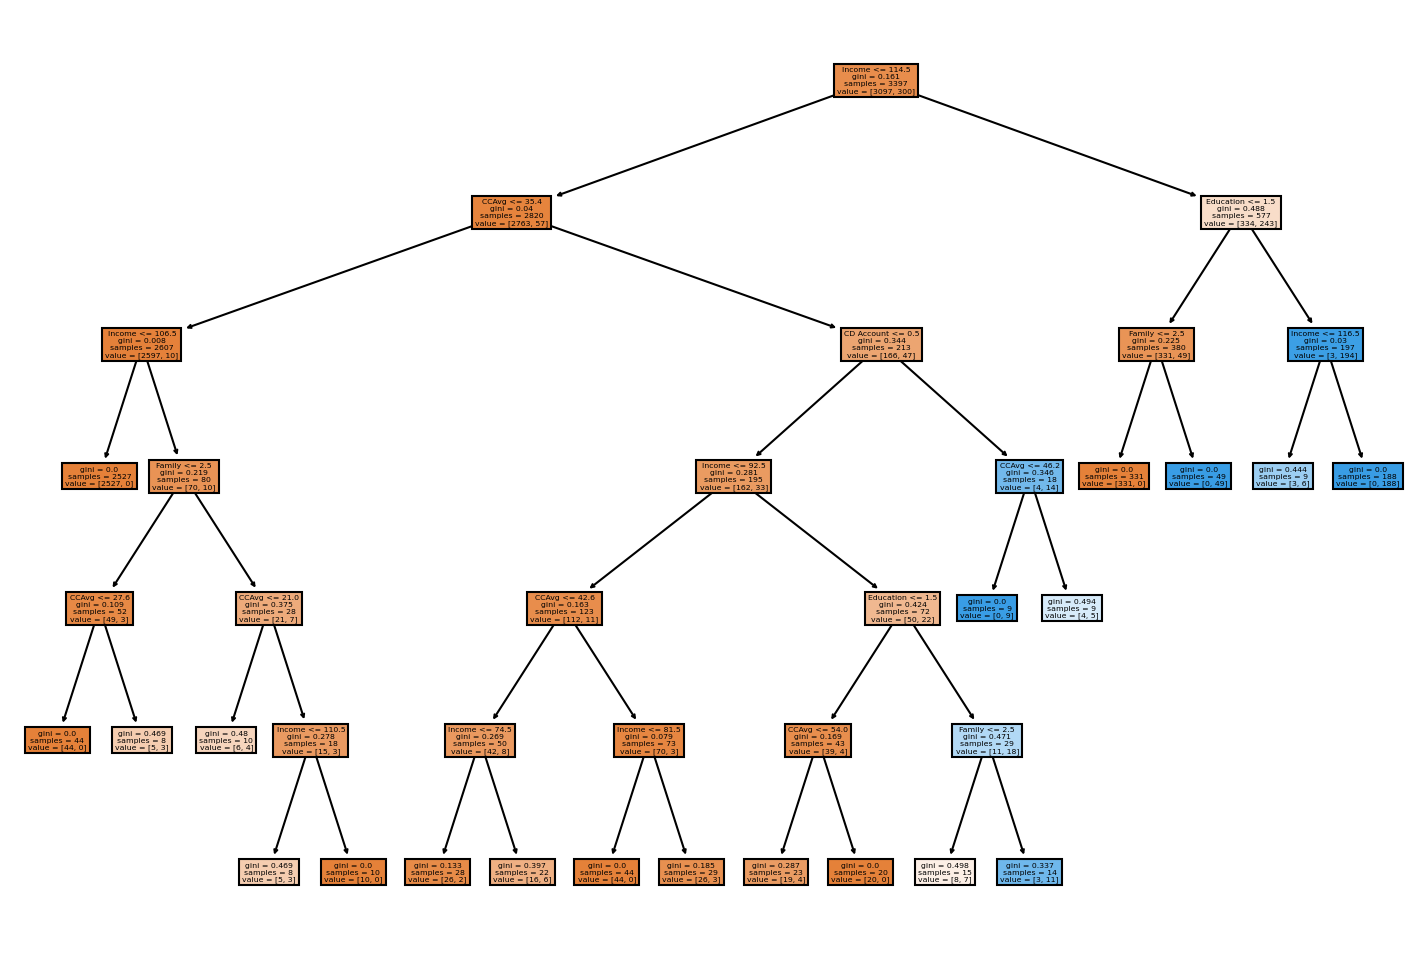

In [51]:
# Extract the best estimator (best model) from Grid Search
best_dt = grid_model.best_estimator_
plt.figure(figsize=(12,8),dpi=150)
plot_tree(best_dt,filled=True,feature_names=X_train.columns.tolist());

---
---

## saving my model

In [52]:
from joblib import dump, load

In [53]:
dump(grid_model, 'my_decision_tree_model.joblib') 

['my_decision_tree_model.joblib']

In [54]:
import tkinter as tk
from tkinter import messagebox

In [55]:
class PredictionGUI:
    def __init__(self, master, feature_names, model_path):
        self.master = master
        self.feature_names = feature_names
        self.model = load(model_path)

        self.entries = []
        self.create_widgets()
        
    def create_widgets(self):
        tk.Label(self.master, text="Enter values for prediction:").grid(row=0, columnspan=2)

        for i, feature_name in enumerate(self.feature_names):
            tk.Label(self.master, text=feature_name).grid(row=i+1, column=0, sticky="e")
            entry = tk.Entry(self.master)
            entry.grid(row=i+1, column=1, padx=5, pady=5)
            self.entries.append(entry)

        predict_button = tk.Button(self.master, text="Predict", command=self.predict)
        predict_button.grid(row=len(self.feature_names)+1, columnspan=2, pady=10)
        
        
    def predict(self):
        inputs = [float(entry.get()) for entry in self.entries]
        inputs = np.array(inputs).reshape(1, -1)
        prediction = self.model.predict(inputs)
        if (prediction[0] == 0):
            messagebox.showinfo("Prediction", f"The predicted output is: {prediction[0]}, which means the likelihood of a liability customer buying personal loans is negative")
        else:
            messagebox.showinfo("Prediction", f"The predicted output is: {prediction[0]}, which means the likelihood of a liability customer buying personal loans is positive")

In [56]:
X_train.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
995,28,3,45,94305,2,19.2,3,0,0,0,1,1
2476,54,28,30,95616,4,8.4,2,0,0,0,1,0
4990,55,25,58,95023,4,24.0,3,219,0,0,0,1
1456,36,11,39,90095,4,20.4,1,0,0,0,1,0
4400,34,10,44,94143,1,16.0,1,0,0,0,1,0


In [57]:
def main():
#   feature_names = ['Feature 1', 'Feature 2', 'Feature 3']  # Replace with your feature names
    model_path = 'my_decision_tree_model.joblib'  # Replace with your model file path

    root = tk.Tk()
    root.title("Prediction GUI")
    gui = PredictionGUI(root, X_train, model_path)
    root.mainloop()

In [58]:
main()